In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys, os
%matplotlib inline

In [2]:
df_6=pd.read_csv('../Data/cisco_telemetry/6/bgpclear_no_traffic_2hourRun.csv', low_memory = False).dropna(axis=1, how='all')
df_6['time'] = pd.to_datetime(df_6['time'].astype('int'), unit='ns')

In [3]:
df_6_gt=pd.read_json('../Data/cisco_telemetry/6/bgpclear_no_traffic_event.log')

In [4]:
df_6.shape

(2845058, 87)

In [6]:
df_6.head()

,name,time,EncodingPath,Producer,acl-in-rpf-packets,active-routes-count,af-name,as,backup-routes-count,bandwidth,...,total-cpu-five-minute,total-cpu-one-minute,total-number-of-drop-packets,unresolved-prefix-packets,unsupported-feature-packets,vrf-name,vrf__neighbors-count,vrf__network-count,vrf__path-count,vrf__update-messages-received
0,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,2018-02-19 19:34:11.292,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,spine4,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,2018-02-19 19:34:11.321,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,spine3,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,2018-02-19 19:34:11.348,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,leaf4,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,2018-02-19 19:34:11.517,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,spine2,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,2018-02-19 19:34:12.297,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,spine1,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [19]:
df_6_gt

,end_time,event_key,host_key,start_time
0,2018-02-19 19:45:17.074,clear_bgp,spine3,2018-02-19 19:45:09.191
1,2018-02-19 19:55:24.453,clear_bgp,leaf2,2018-02-19 19:55:17.102
2,2018-02-19 20:05:31.708,clear_bgp,leaf8,2018-02-19 20:05:24.554
3,2018-02-19 20:15:39.185,clear_bgp,leaf6,2018-02-19 20:15:31.805
4,2018-02-19 20:25:46.426,clear_bgp,leaf5,2018-02-19 20:25:39.285
5,2018-02-19 20:35:53.933,clear_bgp,spine4,2018-02-19 20:35:46.433
6,2018-02-19 20:46:01.221,clear_bgp,leaf4,2018-02-19 20:45:53.987
7,2018-02-19 20:56:08.600,clear_bgp,leaf7,2018-02-19 20:56:01.322
8,2018-02-19 21:06:15.854,clear_bgp,leaf1,2018-02-19 21:06:08.697
9,2018-02-19 21:16:23.360,clear_bgp,spine2,2018-02-19 21:16:15.902


In [7]:
df_6_gt.dtypes

end_time      datetime64[ns]
event_key             object
host_key              object
start_time    datetime64[ns]
dtype: object

In [44]:
df_6_leaf1=df_6.query('Producer == "leaf1"')

In [57]:
condition=(df_6['time']>=df_6_gt.iloc[0]['Start']) & (df_6['time']<df_6_gt.iloc[0]['End'])
ind_anomaly = df_6_leaf1[condition].index
df_6_leaf1['Anomaly']=False
df_6_leaf1['Event']=np.nan
df_6_leaf1['Type']=np.nan
df_6_leaf1.loc[ind_anomaly, 'Anomaly']=True
df_6_leaf1.loc[ind_anomaly, 'Event']='clearBGP'
df_6_leaf1.loc[ind_anomaly, 'Type']='single'
df_6_leaf1.index=df_6_leaf1['time']
df_6_leaf1.index.name='time_ind'

/home/ubuntu/anaconda3/envs/comcast_rnn/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/ubuntu/anaconda3/envs/comcast_rnn/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/ubuntu/anaconda3/envs/comcast_rnn/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ubuntu/anaconda3/envs/comcas

In [58]:
df_6_leaf1.head()

,name,time,EncodingPath,Producer,acl-in-rpf-packets,active-routes-count,af-name,as,backup-routes-count,bandwidth,...,unresolved-prefix-packets,unsupported-feature-packets,vrf-name,vrf__neighbors-count,vrf__network-count,vrf__path-count,vrf__update-messages-received,Anomaly,Event,Type
time_ind,,,,,,,,,,,,,,,,,,,,,
2017-06-29 16:34:34.207,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,2017-06-29 16:34:34.207,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,leaf1,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2017-06-29 16:34:38.726,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,2017-06-29 16:34:38.726,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,leaf1,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2017-06-29 16:34:43.198,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,2017-06-29 16:34:43.198,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,leaf1,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2017-06-29 16:34:47.619,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,2017-06-29 16:34:47.619,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,leaf1,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2017-06-29 16:34:52.121,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,2017-06-29 16:34:52.121,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,leaf1,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN


In [59]:
df_6_leaf1.describe()

,acl-in-rpf-packets,active-routes-count,as,backup-routes-count,bandwidth,bytes-received,bytes-sent,carrier-transitions,checksum-error-packets,crc-errors,...,total-cpu-fifteen-minute,total-cpu-five-minute,total-cpu-one-minute,total-number-of-drop-packets,unresolved-prefix-packets,unsupported-feature-packets,vrf__neighbors-count,vrf__network-count,vrf__path-count,vrf__update-messages-received
count,666.0,667.000000,667.0,667.000000,2.267800e+04,2.267800e+04,2.267800e+04,22678.000000,666.0,22678.0,...,667.000000,667.000000,667.000000,666.0,666.0,666.0,667.0,667.000000,667.000000,667.000000
mean,0.0,164.178411,65021.0,0.995502,9.414706e+07,1.319096e+15,1.318012e+15,0.029412,0.0,0.0,...,28.721139,32.059970,33.493253,0.0,0.0,0.0,38.0,351.901049,4527.454273,71409.236882
std,0.0,11.057302,0.0,0.066965,2.341259e+07,2.162365e+15,2.123859e+15,0.168961,0.0,0.0,...,7.813530,12.137327,13.221985,0.0,0.0,0.0,0.0,0.584419,781.255526,1232.186478
min,0.0,0.000000,65021.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,...,23.000000,24.000000,24.000000,0.0,0.0,0.0,38.0,348.000000,39.000000,69236.000000
25%,0.0,165.000000,65021.0,1.000000,1.000000e+08,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,...,25.000000,25.000000,25.000000,0.0,0.0,0.0,38.0,352.000000,4687.000000,70463.000000
50%,0.0,165.000000,65021.0,1.000000,1.000000e+08,1.074838e+15,1.253287e+15,0.000000,0.0,0.0,...,25.000000,25.000000,26.000000,0.0,0.0,0.0,38.0,352.000000,4687.000000,71524.000000
75%,0.0,165.000000,65021.0,1.000000,1.000000e+08,1.428894e+15,1.447933e+15,0.000000,0.0,0.0,...,29.000000,38.000000,54.000000,0.0,0.0,0.0,38.0,352.000000,4769.000000,72822.000000
max,0.0,165.000000,65021.0,1.000000,1.000000e+08,1.111167e+16,1.016168e+16,1.000000,0.0,0.0,...,53.000000,55.000000,56.000000,0.0,0.0,0.0,38.0,352.000000,6524.000000,72822.000000


In [60]:
df_6_leaf1.sort_values(by='time', ascending=True)

,name,time,EncodingPath,Producer,acl-in-rpf-packets,active-routes-count,af-name,as,backup-routes-count,bandwidth,...,unresolved-prefix-packets,unsupported-feature-packets,vrf-name,vrf__neighbors-count,vrf__network-count,vrf__path-count,vrf__update-messages-received,Anomaly,Event,Type
time_ind,,,,,,,,,,,,,,,,,,,,,
2017-06-29 16:34:33.432,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,2017-06-29 16:34:33.432,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf1,NaN,165.0,IPv4,65021.0,1.0,NaN,...,NaN,NaN,default,NaN,NaN,NaN,NaN,False,NaN,NaN
2017-06-29 16:34:33.506,Cisco-IOS-XR-wdsysmon-fd-oper:system-monitorin...,2017-06-29 16:34:33.506,Cisco-IOS-XR-wdsysmon-fd-oper:system-monitorin...,leaf1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2017-06-29 16:34:33.513,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,2017-06-29 16:34:33.513,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,leaf1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2017-06-29 16:34:33.547,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,2017-06-29 16:34:33.547,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,leaf1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,default,38.0,352.0,4769.0,69236.0,False,NaN,NaN
2017-06-29 16:34:33.577,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,2017-06-29 16:34:33.577,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2017-06-29 16:34:33.579,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,2017-06-29 16:34:33.579,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,NaN,NaN,NaN,NaN,NaN,1000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2017-06-29 16:34:33.582,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,2017-06-29 16:34:33.582,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,NaN,NaN,NaN,NaN,NaN,100000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2017-06-29 16:34:33.584,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,2017-06-29 16:34:33.584,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,NaN,NaN,NaN,NaN,NaN,100000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2017-06-29 16:34:33.586,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,2017-06-29 16:34:33.586,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,NaN,NaN,NaN,NaN,NaN,100000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN


In [61]:
df_6_leaf1_rolling=df_6_leaf1.sort_values(by='time', ascending=True).rolling('15s', on='time')

In [66]:
df_6_leaf1.sort_values(by='time', ascending=True)['vrf__update-messages-received']

time_ind
2017-06-29 16:34:33.432        NaN
2017-06-29 16:34:33.506        NaN
2017-06-29 16:34:33.513        NaN
2017-06-29 16:34:33.547    69236.0
2017-06-29 16:34:33.577        NaN
2017-06-29 16:34:33.579        NaN
2017-06-29 16:34:33.582        NaN
2017-06-29 16:34:33.584        NaN
2017-06-29 16:34:33.586        NaN
2017-06-29 16:34:33.589        NaN
2017-06-29 16:34:33.591        NaN
2017-06-29 16:34:33.594        NaN
2017-06-29 16:34:33.596        NaN
2017-06-29 16:34:33.606        NaN
2017-06-29 16:34:33.609        NaN
2017-06-29 16:34:33.611        NaN
2017-06-29 16:34:33.614        NaN
2017-06-29 16:34:33.634        NaN
2017-06-29 16:34:33.637        NaN
2017-06-29 16:34:33.639        NaN
2017-06-29 16:34:33.641        NaN
2017-06-29 16:34:33.643        NaN
2017-06-29 16:34:33.646        NaN
2017-06-29 16:34:33.648        NaN
2017-06-29 16:34:33.650        NaN
2017-06-29 16:34:33.653        NaN
2017-06-29 16:34:33.655        NaN
2017-06-29 16:34:33.657        NaN
2017-06-29 

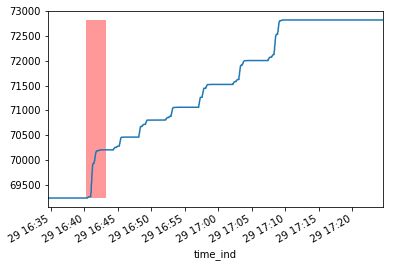

In [81]:
df_6_leaf1_rolling['vrf__update-messages-received'].mean().plot()
plt.fill_between([df_6_gt.iloc[0]['Start'], df_6_gt.iloc[0]['End']], 
                 df_6_leaf1_rolling['vrf__update-messages-received'].mean().min(), 
                 df_6_leaf1_rolling['vrf__update-messages-received'].mean().max(), 
                 facecolor='red', alpha=0.4,)

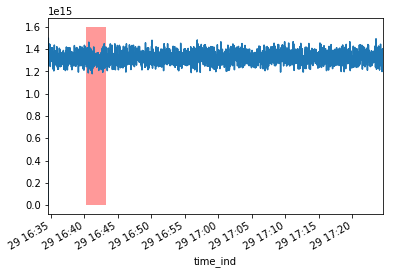

In [78]:
df_6_leaf1_rolling['bytes-sent'].mean().plot()
# plt.vlines([df_6_gt.iloc[0]['Start'], df_6_gt.iloc[0]['End']], 0, 1.6e15)
plt.fill_between([df_6_gt.iloc[0]['Start'], df_6_gt.iloc[0]['End']], 0, 1.6e15, facecolor='red', alpha=0.4,)

In [85]:
df_6_leaf1.columns[df_6_leaf1.dtypes=='float64']

Index(['acl-in-rpf-packets', 'active-routes-count', 'as',
       'backup-routes-count', 'bandwidth', 'bytes-received', 'bytes-sent',
       'carrier-transitions', 'checksum-error-packets', 'crc-errors',
       'deleted-routes-count', 'df-unreachable-packets', 'discard-packets',
       'encapsulation-failure-packets', 'fragmenation-consumed-packets',
       'fragmenation-failure-packets', 'free-application-memory',
       'free-physical-memory', 'global__established-neighbors-count-total',
       'global__neighbors-count-total', 'global__nexthop-count',
       'global__restart-count', 'gre-error-drop', 'gre-lookup-failed-drop',
       'incomplete-adjacency-packets', 'input-data-rate', 'input-drops',
       'input-errors', 'input-ignored-packets', 'input-load',
       'input-packet-rate', 'input-queue-drops', 'lisp-decap-error-drops',
       'lisp-encap-error-drops', 'lisp-punt-drops', 'load-interval',
       'mpls-disabled-interface', 'multi-label-drops', 'no-route-packets',
       'nul

In [86]:
leaf1_error_start=df_6_gt.iloc[0]['Start']
leaf1_error_end=df_6_gt.iloc[0]['End']

In [89]:
n_rows

16.0

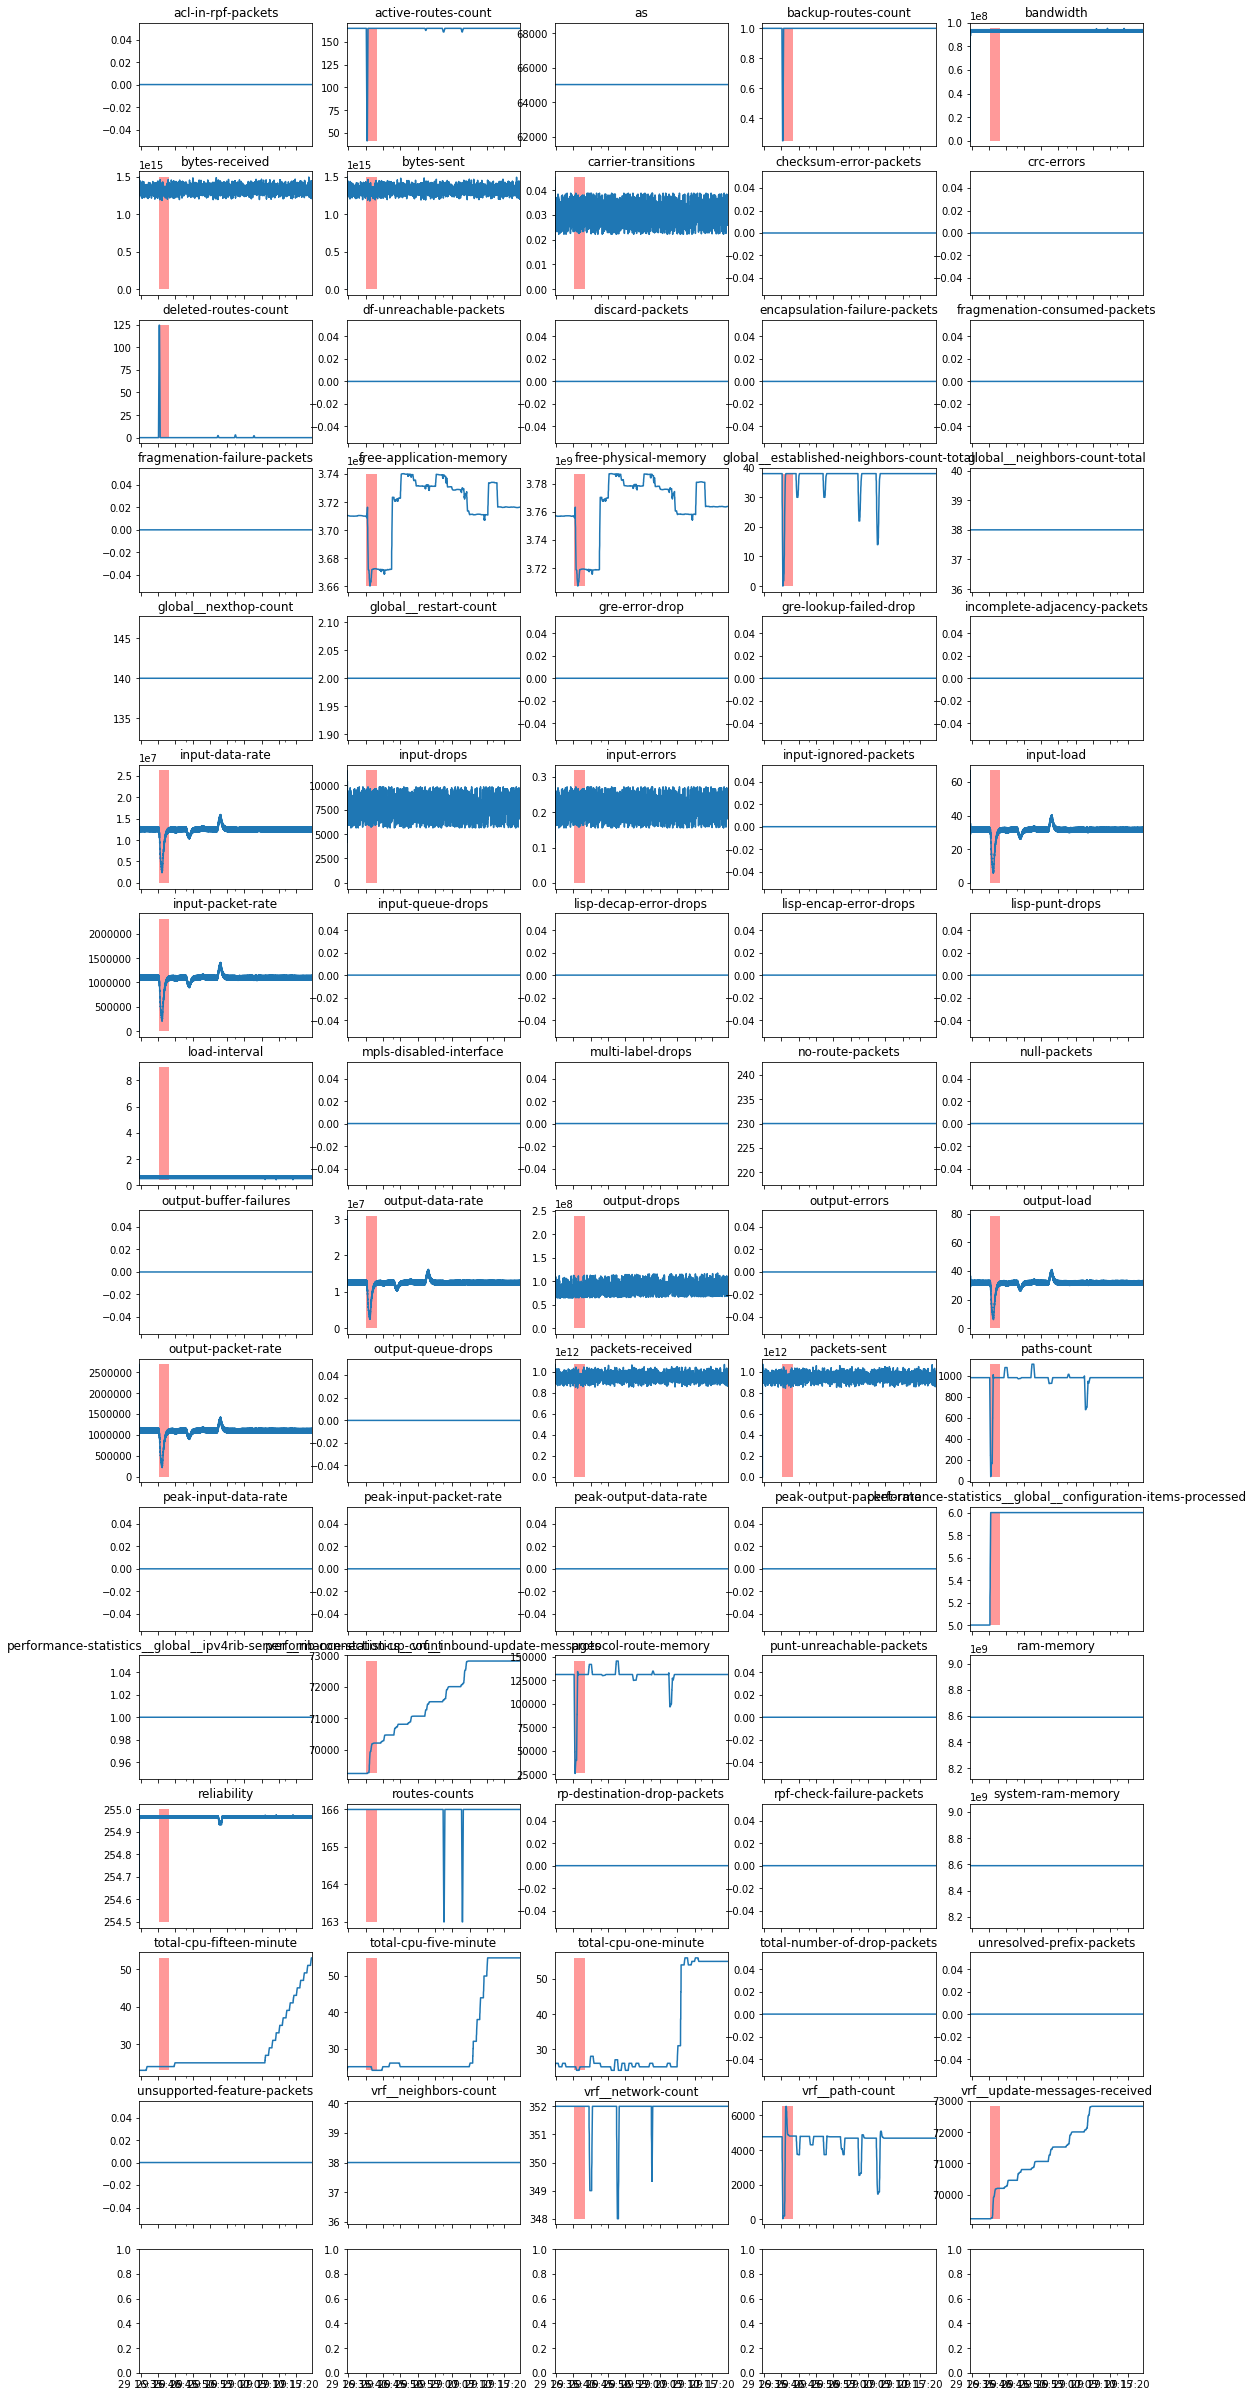

In [92]:
df_6_leaf1_rolling=df_6_leaf1.sort_values(by='time', ascending=True).rolling('15s', on='time')
float_cols=df_6_leaf1.columns[df_6_leaf1.dtypes=='float64']
n_rows=int(len(float_cols)/5)
f, ax=plt.subplots(n_rows, 5, figsize=(18, 3*n_rows), sharex=True)
for i, col in enumerate(float_cols):
    x_ind=int(i/5)
    y_ind=int(i%5)
    df_6_leaf1_rolling[col].mean().plot(ax=ax[x_ind][y_ind], title=col)
    ax[x_ind][y_ind].fill_between([leaf1_error_start, leaf1_error_end], 
                                  df_6_leaf1_rolling[col].mean().min(), 
                                  df_6_leaf1_rolling[col].mean().max(), 
                                  facecolor='red', alpha=0.4,)    

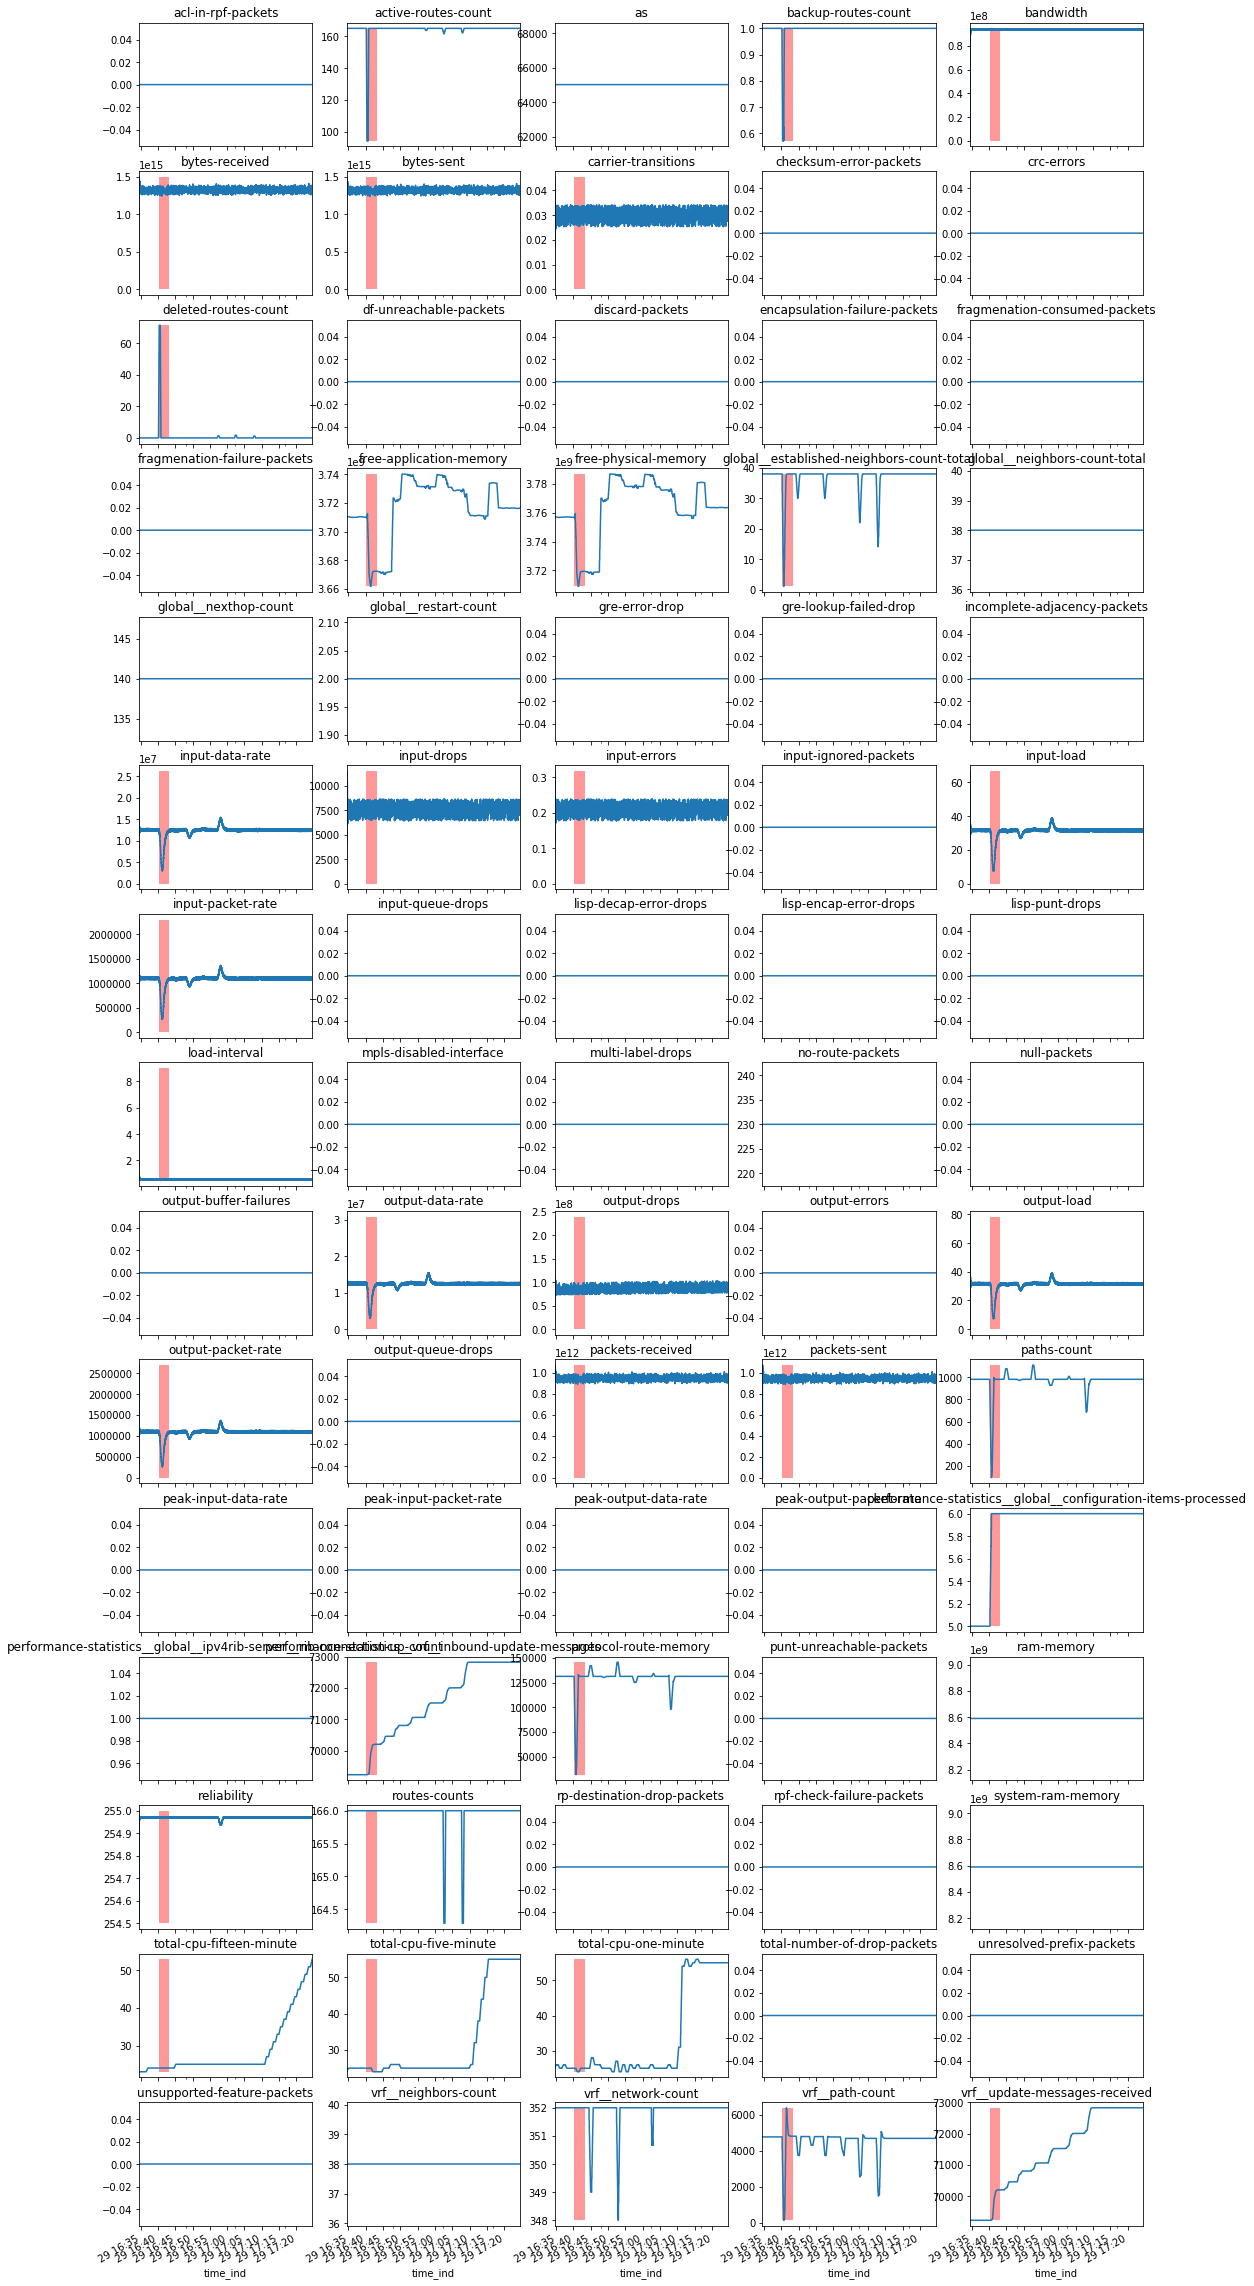

In [94]:
df_6_leaf1_rolling=df_6_leaf1.sort_values(by='time', ascending=True).rolling('30s', on='time')
float_cols=df_6_leaf1.columns[df_6_leaf1.dtypes=='float64']
n_rows=int(len(float_cols)/5)
f, ax=plt.subplots(n_rows, 5, figsize=(18, 3*n_rows), sharex=True)
for i, col in enumerate(float_cols):
    x_ind=int(i/5)
    y_ind=int(i%5)
    df_6_leaf1_rolling[col].mean().plot(ax=ax[x_ind][y_ind], title=col)
    ax[x_ind][y_ind].fill_between([leaf1_error_start, leaf1_error_end], 
                                  df_6_leaf1_rolling[col].mean().min(), 
                                  df_6_leaf1_rolling[col].mean().max(), 
                                  facecolor='red', alpha=0.4,)    

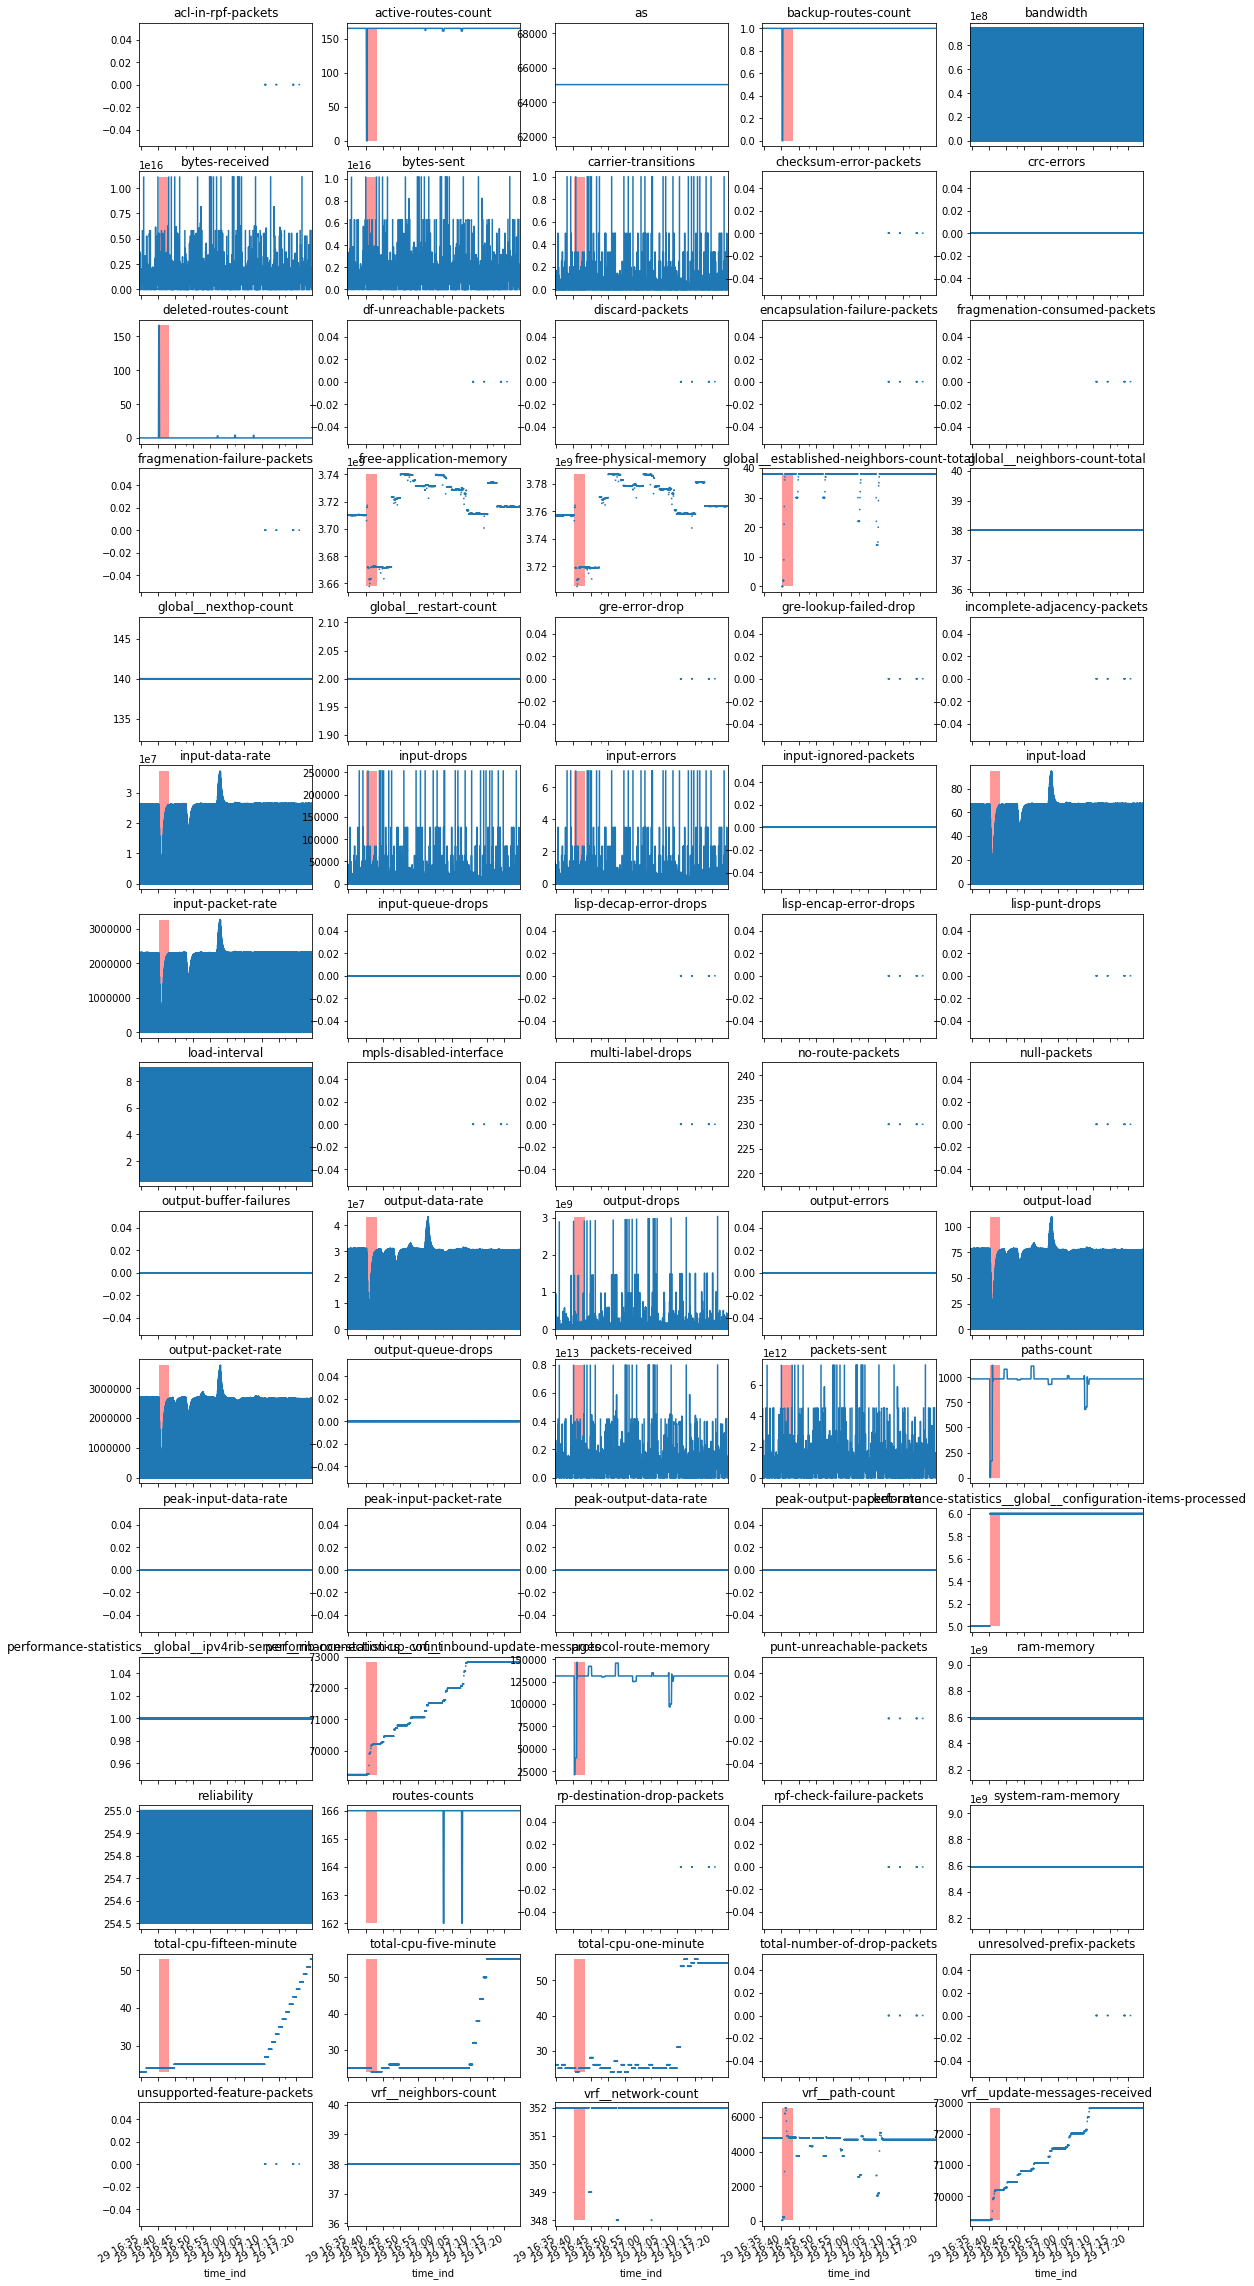

In [95]:
df_6_leaf1_rolling=df_6_leaf1.sort_values(by='time', ascending=True).rolling('3s', on='time')
float_cols=df_6_leaf1.columns[df_6_leaf1.dtypes=='float64']
n_rows=int(len(float_cols)/5)
f, ax=plt.subplots(n_rows, 5, figsize=(18, 3*n_rows), sharex=True)
for i, col in enumerate(float_cols):
    x_ind=int(i/5)
    y_ind=int(i%5)
    df_6_leaf1_rolling[col].mean().plot(ax=ax[x_ind][y_ind], title=col)
    ax[x_ind][y_ind].fill_between([leaf1_error_start, leaf1_error_end], 
                                  df_6_leaf1_rolling[col].mean().min(), 
                                  df_6_leaf1_rolling[col].mean().max(), 
                                  facecolor='red', alpha=0.4,)    

In [96]:
df_6['Producer'].unique()

array(['leaf2', 'spine3', 'leaf8', 'leaf1', 'leaf6', 'spine1', 'leaf5',
       'spine4', 'leaf7', 'leaf3', 'spine2', 'dr01', 'dr03', 'dr02'],
      dtype=object)

In [141]:
aa=((df_6_producer.dtypes=='float64') & (df_6_producer.std()>0))
aa.index[aa]

Index(['active-routes-count', 'bandwidth', 'bytes-received', 'bytes-sent',
       'carrier-transitions', 'deleted-routes-count',
       'free-application-memory', 'free-physical-memory',
       'global__established-neighbors-count-total', 'input-data-rate',
       'input-drops', 'input-errors', 'input-load', 'input-packet-rate',
       'load-interval', 'output-data-rate', 'output-drops', 'output-load',
       'output-packet-rate', 'packets-received', 'packets-sent', 'paths-count',
       'performance-statistics__global__configuration-items-processed',
       'performance-statistics__vrf__inbound-update-messages',
       'protocol-route-memory', 'reliability', 'routes-counts',
       'total-cpu-fifteen-minute', 'total-cpu-five-minute',
       'total-cpu-one-minute', 'vrf__network-count', 'vrf__path-count',
       'vrf__update-messages-received'],
      dtype='object')

In [136]:
float_cols

Index(['Producer', 'as', 'backup-routes-count', 'bandwidth', 'bytes-received',
       'checksum-error-packets', 'fragmenation-consumed-packets',
       'fragmenation-failure-packets', 'free-application-memory',
       'gre-lookup-failed-drop', 'incomplete-adjacency-packets',
       'input-data-rate', 'input-errors', 'input-ignored-packets',
       'lisp-encap-error-drops', 'output-buffer-failures', 'output-data-rate',
       'output-errors', 'output-load', 'output-queue-drops',
       'packets-received', 'packets-sent', 'peak-output-packet-rate',
       'performance-statistics__global__ipv4rib-server__rib-connection-up-count',
       'performance-statistics__vrf__inbound-update-messages', 'ram-memory',
       'route-table-name', 'total-cpu-fifteen-minute', 'total-cpu-five-minute',
       'total-cpu-one-minute', 'vrf__network-count', 'vrf__path-count',
       'vrf__update-messages-received'],
      dtype='object')

In [16]:
error_start, error_end

(numpy.datetime64('2018-02-19T19:55:17.102000000'),
 numpy.datetime64('2018-02-19T19:55:24.453000000'))

In [14]:
float_cols

Index(['active-routes-count', 'backup-routes-count', 'bandwidth',
       'bytes-received', 'bytes-sent', 'carrier-transitions',
       'deleted-routes-count', 'free-application-memory',
       'free-physical-memory', 'global__established-neighbors-count-total',
       'input-data-rate', 'input-drops', 'input-packet-rate', 'load-interval',
       'output-data-rate', 'output-drops', 'output-packet-rate',
       'packets-received', 'packets-sent', 'paths-count',
       'performance-statistics__global__configuration-items-processed',
       'performance-statistics__vrf__inbound-update-messages',
       'protocol-route-memory', 'reliability', 'routes-counts',
       'total-cpu-fifteen-minute', 'total-cpu-five-minute',
       'total-cpu-one-minute', 'vrf__path-count',
       'vrf__update-messages-received'],
      dtype='object')

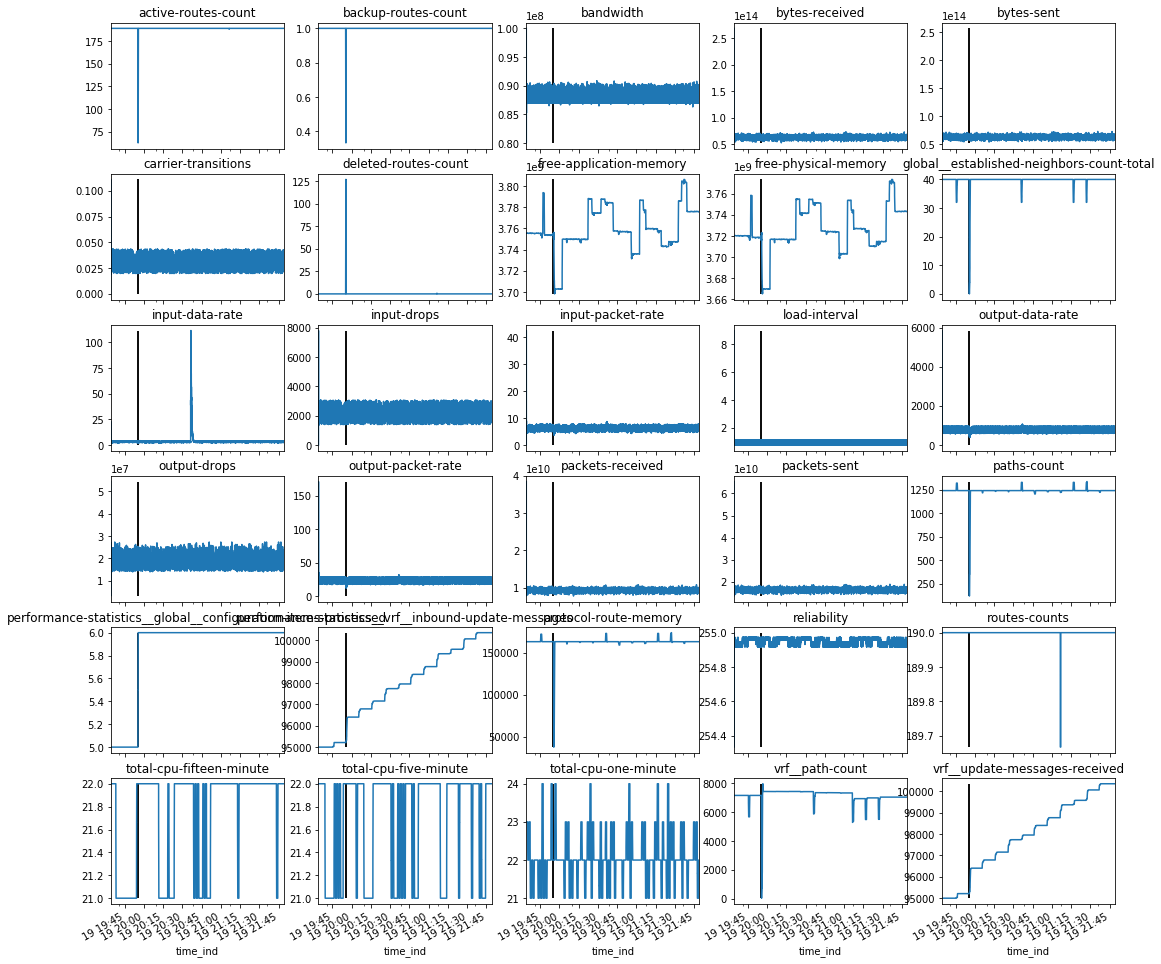

In [18]:
node='leaf2'
df_6_producer=df_6.query('Producer == "%s"' % node)
df_6_producer.index=df_6_producer['time']
df_6_producer.index.name='time_ind'
df_6_producer_rolling=df_6_producer.sort_values(by='time', ascending=True).rolling('15s', on='time')
error_start=df_6_gt.query('host_key == "%s"'%node)['start_time'].values[0]
error_end=df_6_gt.query('host_key == "%s"'%node)['end_time'].values[0]
float_cols=(df_6_producer.dtypes=='float64') & (df_6_producer.std()>0)
float_cols=float_cols.index[float_cols]
#print(len(float_cols))
n_rows=np.round(len(float_cols)/5).astype(int)
f, ax=plt.subplots(n_rows, 5, figsize=(18, 3*n_rows), sharex=True)
for i, col in enumerate(float_cols):
#     print(col)
    x_ind=int(i/5)
    y_ind=int(i%5)
    data=df_6_producer_rolling[col].mean()
    data.plot(ax=ax[x_ind][y_ind], title=col)
    if data.max()>data.min():
        ax[x_ind][y_ind].vlines([error_start, error_end], data.min(), data.max(), 'k')
#         ax[x_ind][y_ind].fill_between([error_start, error_end], 
#                                       data.min(), data.max(), 
#                                       facecolor='red', alpha=0.4,)    